In [103]:
import pandas as pd 
import numpy as np

In [104]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [105]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3537,ham,We are pleased to inform that your application...,NaN,NaN,NaN
2647,ham,"It,,s a taxt massage....tie-pos argh ok! Lool!",NaN,NaN,NaN
398,ham,"Good evening Sir, Al Salam Wahleykkum.sharing ...",NaN,NaN,NaN
4737,ham,I bought the test yesterday. Its something tha...,NaN,NaN,NaN
717,ham,Book which lesson? then you msg me... I will c...,NaN,NaN,NaN


In [106]:
df.shape

(5572, 5)

In [107]:
#data cleaning
#EDA
#Text Preprocessing
#Model Building
#Evaluation
#Improvement
#Website
#Deployment


**1. DATA CLEANING**

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [109]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [110]:
df.sample(5)

,v1,v2
3403,ham,Then Ì_ ask dad to pick Ì_ up lar... ÌÏ wan 2 ...
2068,ham,Its hard to believe things like this. All can ...
3934,ham,You need to get up. Now.
1464,ham,Wat makes u thk i'll fall down. But actually i...
1053,ham,Jay's getting really impatient and belligerent


In [111]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1115,ham,So lets make it saturday or monday as per conv...
2436,ham,Btw regarding that we should really try to see...
2382,ham,I will reach before ten morning
4254,spam,Block Breaker now comes in deluxe format with ...
2613,ham,Thanks for sending this mental ability question..


In [112]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [113]:
df['target']=encoder.fit_transform(df['target'])

In [114]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [115]:
#check for duplicates
df.duplicated().sum()

np.int64(403)

In [116]:
#remove the duplicates 
df=df.drop_duplicates(keep='first')

In [117]:
df.duplicated().sum()

np.int64(0)

In [118]:
df.shape


(5169, 2)

**2. EDA**

In [119]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [120]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x27589303880>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

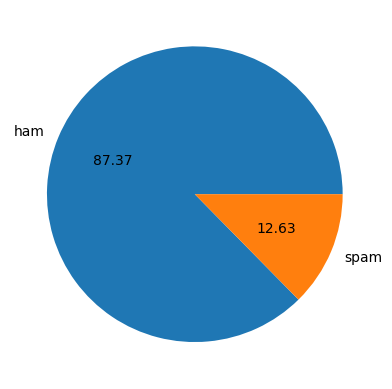

In [121]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [122]:
#data is imbalanced


In [123]:
import nltk

In [124]:
nltk.download('punkt')
nltk.download('punkt_tab') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tomar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [125]:
df['num_characters']=df['text'].apply(len)

In [126]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [127]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tomar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [128]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [129]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [130]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [131]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [132]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [133]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [134]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='num_characters', ylabel='Count'>

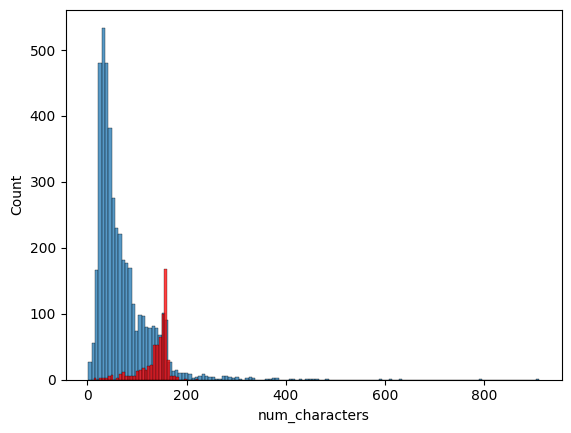

In [136]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

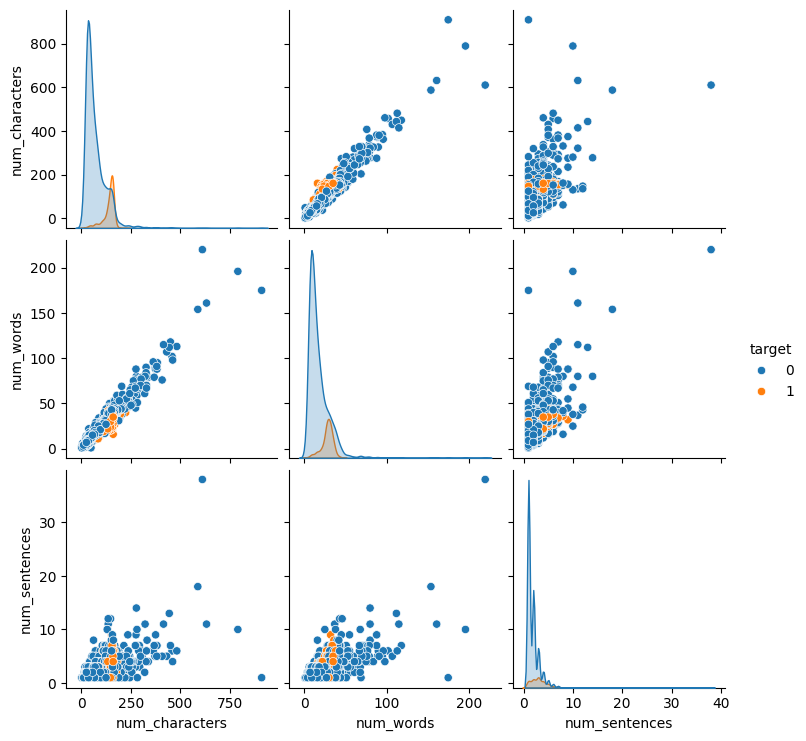

In [137]:
sns.pairplot(df,hue='target')

In [138]:

df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: >

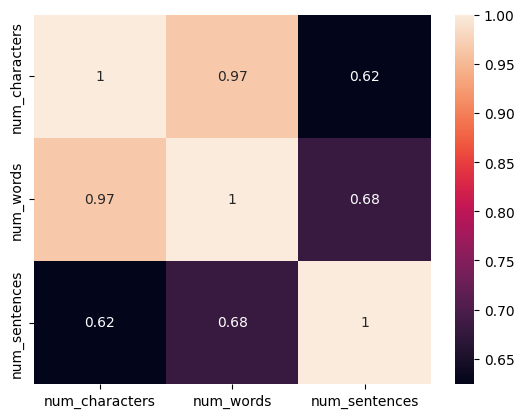

In [139]:
cols=['num_characters','num_words','num_sentences']
sns.heatmap(df[cols].corr(),annot=True)

**Data Preprocessing**
- lower case  
- tokenization  
- removing special characters  
- removing stop words and punctuation  
- stemming  

In [140]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    
    from nltk.corpus import stopwords
    for i in text:
        if i not in stopwords.words('english') and i not in '0123456789':
            y.append(i)
    
    text=y[:]
    y.clear()
    
    from nltk.stem.porter import PorterStemmer
    ps=PorterStemmer()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [141]:
df['transformed_text']=df['text'].apply(transform_text)

In [142]:
from wordcloud import WordCloud
wc=WordCloud(width=500 ,height=500,min_font_size=10,background_color='white'  )

In [143]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

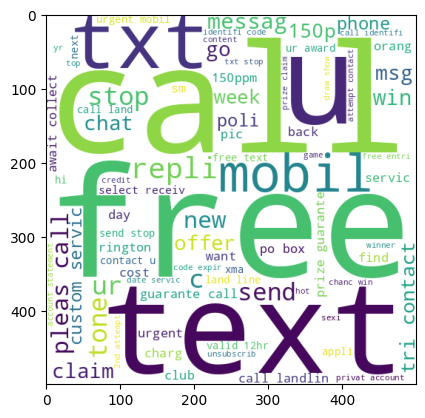

In [144]:
plt.imshow(spam_wc)

In [145]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

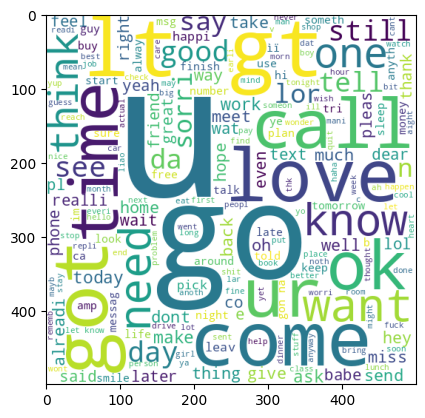

In [146]:
plt.imshow(ham_wc)

In [147]:
spam_corpus=[]
for msfg in df[df['target']==1]['transformed_text'].tolist():
    for word in msfg.split():
        spam_corpus.append(word)

In [148]:
len(spam_corpus)

9615

<Axes: xlabel='word', ylabel='count'>

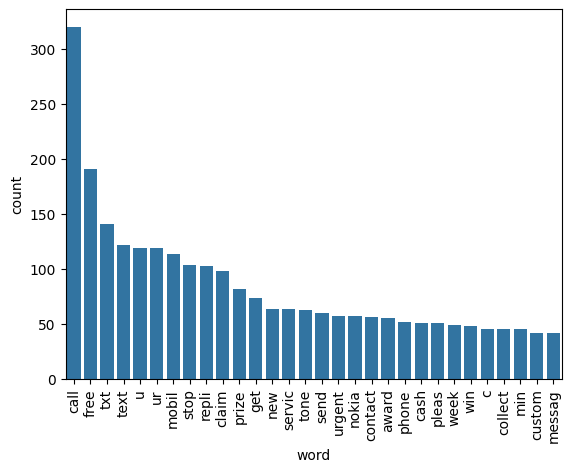

In [149]:
from collections import Counter
common_words=Counter(spam_corpus).most_common(30)
df_common=pd.DataFrame(common_words,columns=['word','count'])
plt.xticks(rotation='vertical')
sns.barplot(x='word',y='count',data=df_common)

In [150]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt 21st...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [151]:
ham_corpus=[]
for msfg in df[df['target']==0]['transformed_text'].tolist():
    for word in msfg.split():
        ham_corpus.append(word)

In [152]:
len(ham_corpus)

34790

<Axes: xlabel='word', ylabel='count'>

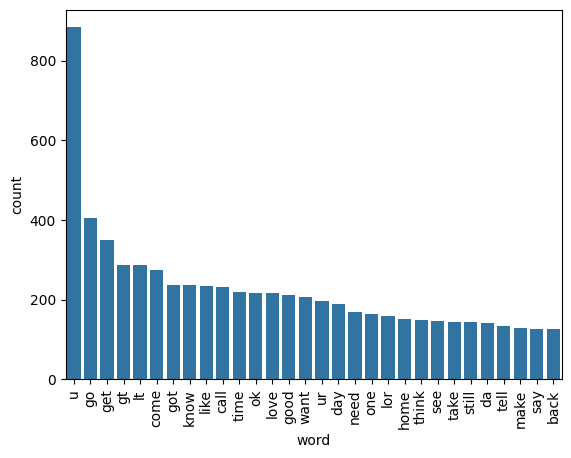

In [153]:
from collections import Counter
common_words1=Counter(ham_corpus).most_common(30)
df_common1=pd.DataFrame(common_words1,columns=['word','count'])
plt.xticks(rotation='vertical')
sns.barplot(x='word',y='count',data=df_common1)

**4. Model Building**

In [154]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [155]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [156]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)

In [157]:
X.shape

(5169, 3000)

In [158]:
y=df['target'].values

In [159]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


In [162]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [163]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [164]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[791 105]
 [ 25 113]]
0.518348623853211


In [165]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))

print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [166]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [167]:
#tfidf----->mnb

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier

In [169]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bgc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)


In [170]:
clfs={
    'SVC':svc,
    'KNC':knc,
    'MNB':mnb,
    'DTC':dtc,
    'LRC':lrc,
    'RFC':rfc,
    'ABC':abc,
    'BGC':bgc,
    'ETC':etc,
    'GBDT':gbdt,
    'XGB':xgb
}

In [171]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [172]:
train_classifier(svc,X_train,y_train,X_test,y_test  )

(0.9758220502901354, 0.9747899159663865)

In [173]:
accuracy_scores=[]
precision_scores=[]

for name , clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print(f"For {name} accuracy is {current_accuracy} and precision is {current_precision}")
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC accuracy is 0.9758220502901354 and precision is 0.9747899159663865
For KNC accuracy is 0.9052224371373307 and precision is 1.0
For MNB accuracy is 0.9709864603481625 and precision is 1.0
For DTC accuracy is 0.9323017408123792 and precision is 0.8333333333333334
For LRC accuracy is 0.9564796905222437 and precision is 0.9696969696969697
For RFC accuracy is 0.9738878143133463 and precision is 0.9826086956521739
For ABC accuracy is 0.9235976789168279 and precision is 0.8390804597701149
For BGC accuracy is 0.9555125725338491 and precision is 0.8538461538461538
For ETC accuracy is 0.9787234042553191 and precision is 0.9754098360655737
For GBDT accuracy is 0.9516441005802708 and precision is 0.9313725490196079
For XGB accuracy is 0.9661508704061895 and precision is 0.9327731092436975


In [174]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values(by='Precision',ascending=False)

In [175]:
performance_df1=pd.melt(performance_df,id_vars='Algorithm')

In [176]:
performance_df1

,Algorithm,variable,value
0,KNC,Accuracy,0.905222
1,MNB,Accuracy,0.970986
2,RFC,Accuracy,0.973888
3,ETC,Accuracy,0.978723
4,SVC,Accuracy,0.975822
5,LRC,Accuracy,0.956480
6,XGB,Accuracy,0.966151
7,GBDT,Accuracy,0.951644
8,BGC,Accuracy,0.955513
9,ABC,Accuracy,0.923598


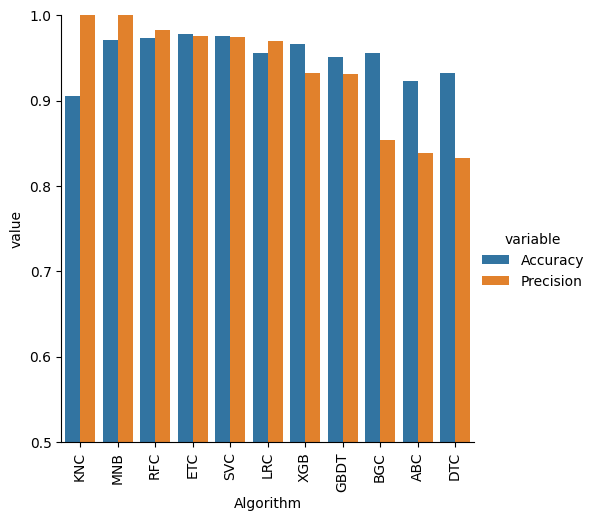

In [177]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)

plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()


In [178]:
#model improve
#1. change the max_features in tfidf


In [179]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values(by='Precision',ascending=False)

In [180]:
merged_df = performance_df.merge(temp_df, on='Algorithm', suffixes=('', '_drop'))
merged_df = merged_df[[c for c in merged_df.columns if not c.endswith('_drop')]]


In [181]:
merged_df

,Algorithm,Accuracy,Precision
0,KNC,0.905222,1.000000
1,MNB,0.970986,1.000000
2,RFC,0.973888,0.982609
3,ETC,0.978723,0.975410
4,SVC,0.975822,0.974790
5,LRC,0.956480,0.969697
6,XGB,0.966151,0.932773
7,GBDT,0.951644,0.931373
8,BGC,0.955513,0.853846
9,ABC,0.923598,0.839080


In [182]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [183]:

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [184]:

voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [185]:

y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9836065573770492


In [186]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [187]:
from sklearn.ensemble import StackingClassifier

In [188]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [189]:

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


In [190]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))